### Packages

### TASK 1

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pylab as py
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import explained_variance_score

%pylab inline


Populating the interactive namespace from numpy and matplotlib


### Task 2

In [53]:


cust=pd.read_csv('cust.csv')


In [54]:
cust.head()


,cust_id,join_date,gender,age,marital_status,household_income,home_ownership,num_children,num_vehicles,last_purchase_date,spend
0,CUST-292802,2021-07-31 14:21:22,F,47,married,268140,rent,2,3,2021-08-28 06:26:18,3340
1,CUST-775681,2019-01-05 20:09:12,F,50,married,361277,rent,0,1,2021-01-17 19:09:08,2735
2,CUST-424898,2020-02-12 06:37:13,F,29,married,275343,own,0,1,2021-06-03 09:03:23,4921
3,CUST-689035,2020-01-06 04:06:18,F,22,married,379490,own,1,4,2021-06-08 08:39:46,6514
4,CUST-182087,2017-10-09 14:37:36,F,48,married,385835,own,0,2,2021-06-14 14:32:40,6287


### TASK 3

In [55]:
#num_rows=number of rows
#num_cols=number of cols

In [406]:
num_cols=len(cust.columns)
num_rows=len(cust.index)

In [407]:
num_rows

500

In [408]:
num_cols

15

### Missing Data

In [59]:

cust.isnull().sum()
# Hence No missing data

cust_id               0
join_date             0
gender                0
age                   0
marital_status        0
household_income      0
home_ownership        0
num_children          0
num_vehicles          0
last_purchase_date    0
spend                 0
dtype: int64

In [60]:
#To check any empty columns
empty_col=[col for col in cust.columns if cust[col].isnull().any()]
empty_col

[]

<AxesSubplot:>

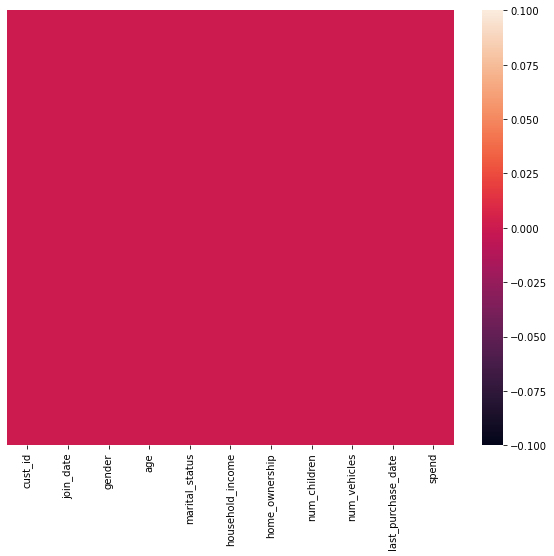

In [61]:
#To visualize Missing Data
fig=py.figure(figsize=(10,8))
sns.heatmap(cust.isnull(),yticklabels=False)

In [62]:
# The above Diagram Shows that there is no missing data in cust dataset

### Show the summary statistics for the quantitative variables

In [63]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cust_id             500 non-null    object
 1   join_date           500 non-null    object
 2   gender              500 non-null    object
 3   age                 500 non-null    int64 
 4   marital_status      500 non-null    object
 5   household_income    500 non-null    int64 
 6   home_ownership      500 non-null    object
 7   num_children        500 non-null    int64 
 8   num_vehicles        500 non-null    int64 
 9   last_purchase_date  500 non-null    object
 10  spend               500 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 43.1+ KB


In [64]:
cust.describe()

,age,household_income,num_children,num_vehicles,spend
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,36.942000,295650.654000,2.472000,2.434000,4239.824000
std,10.671945,112824.410498,1.726028,1.738876,1618.311124
min,20.000000,65521.000000,0.000000,0.000000,1475.000000
25%,28.000000,217903.500000,1.000000,1.000000,2810.500000
50%,36.500000,300429.500000,2.000000,2.000000,4266.000000
75%,46.000000,384768.500000,4.000000,4.000000,5443.250000
max,56.000000,489722.000000,5.000000,5.000000,7300.000000


In [65]:
cust.profile_report()

### Check Duplicate Values 

In [66]:
len(cust.cust_id.unique())

500

In [67]:
cust.cust_id.duplicated().count()

500

The code above shows that there is no duplicate value in the `cust_id` columns all the `cust_id` values are unique

### Categorical Variables 

In [68]:
#Categorical Variables are gender, marital_status, home_ownership
cust_cat=cust[['gender','marital_status','home_ownership']]
cust_cat.head()

,gender,marital_status,home_ownership
0,F,married,rent
1,F,married,rent
2,F,married,own
3,F,married,own
4,F,married,own


In [73]:
cat_var=pd.get_dummies(cust_cat,drop_first=True)

In [85]:
cat_var.head()

,gender_M,marital_status_unmarried,home_ownership_rent,home_ownership_unknown
0,0,0,1,0
1,0,0,1,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [82]:
cat_var['gender_M'].value_counts()

0    346
1    154
Name: gender_M, dtype: int64

In [84]:
cat_var['marital_status_unmarried'].value_counts()

0    375
1    125
Name: marital_status_unmarried, dtype: int64

In [86]:
cat_var['home_ownership_rent'].value_counts()

0    378
1    122
Name: home_ownership_rent, dtype: int64

In [87]:
cat_var['home_ownership_unknown'].value_counts()

0    443
1     57
Name: home_ownership_unknown, dtype: int64

In [76]:
cust.drop(['gender','marital_status','home_ownership'],axis=1,inplace=True)

In [77]:
cust.head()

,cust_id,join_date,age,household_income,num_children,num_vehicles,last_purchase_date,spend
0,CUST-292802,2021-07-31 14:21:22,47,268140,2,3,2021-08-28 06:26:18,3340
1,CUST-775681,2019-01-05 20:09:12,50,361277,0,1,2021-01-17 19:09:08,2735
2,CUST-424898,2020-02-12 06:37:13,29,275343,0,1,2021-06-03 09:03:23,4921
3,CUST-689035,2020-01-06 04:06:18,22,379490,1,4,2021-06-08 08:39:46,6514
4,CUST-182087,2017-10-09 14:37:36,48,385835,0,2,2021-06-14 14:32:40,6287


In [79]:
cust['gender']=cat_var.gender_M

In [89]:
cust['marital_status']=cat_var['marital_status_unmarried']

In [93]:
cust['home_ownership_rent']=cat_var['home_ownership_rent']
cust['home_ownership_unknown']=cat_var['home_ownership_unknown']

In [94]:
cust.head()

,cust_id,join_date,age,household_income,num_children,num_vehicles,last_purchase_date,spend,gender,marital_status,home_ownership_rent,home_ownership_unknown
0,CUST-292802,2021-07-31 14:21:22,47,268140,2,3,2021-08-28 06:26:18,3340,0,0,1,0
1,CUST-775681,2019-01-05 20:09:12,50,361277,0,1,2021-01-17 19:09:08,2735,0,0,1,0
2,CUST-424898,2020-02-12 06:37:13,29,275343,0,1,2021-06-03 09:03:23,4921,0,0,0,0
3,CUST-689035,2020-01-06 04:06:18,22,379490,1,4,2021-06-08 08:39:46,6514,0,0,0,0
4,CUST-182087,2017-10-09 14:37:36,48,385835,0,2,2021-06-14 14:32:40,6287,0,0,0,0


In [95]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cust_id                 500 non-null    object
 1   join_date               500 non-null    object
 2   age                     500 non-null    int64 
 3   household_income        500 non-null    int64 
 4   num_children            500 non-null    int64 
 5   num_vehicles            500 non-null    int64 
 6   last_purchase_date      500 non-null    object
 7   spend                   500 non-null    int64 
 8   gender                  500 non-null    uint8 
 9   marital_status          500 non-null    uint8 
 10  home_ownership_rent     500 non-null    uint8 
 11  home_ownership_unknown  500 non-null    uint8 
dtypes: int64(5), object(3), uint8(4)
memory usage: 33.3+ KB


### Task 5

In [97]:
#Heat Map for Correlation

<AxesSubplot:>

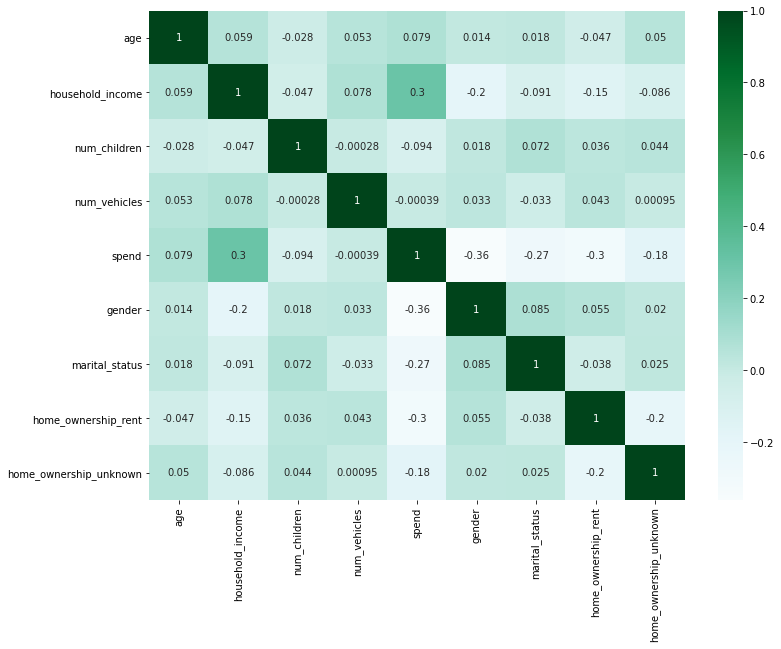

In [114]:
fig=py.figure(figsize=(12,9))
sns.heatmap(cust.corr(),annot=True,cmap='BuGn')

### Task 6

In [116]:
#Cust_id columns is not neccesary 
cust.drop('cust_id',axis=1,inplace=True)
cust.head()

,join_date,age,household_income,num_children,num_vehicles,last_purchase_date,spend,gender,marital_status,home_ownership_rent,home_ownership_unknown
0,2021-07-31 14:21:22,47,268140,2,3,2021-08-28 06:26:18,3340,0,0,1,0
1,2019-01-05 20:09:12,50,361277,0,1,2021-01-17 19:09:08,2735,0,0,1,0
2,2020-02-12 06:37:13,29,275343,0,1,2021-06-03 09:03:23,4921,0,0,0,0
3,2020-01-06 04:06:18,22,379490,1,4,2021-06-08 08:39:46,6514,0,0,0,0
4,2017-10-09 14:37:36,48,385835,0,2,2021-06-14 14:32:40,6287,0,0,0,0


In [118]:
type(cust['join_date'].loc[0])

str

In [119]:
#Convert the 'join_date' and 'last_purchase' date to TimeStamp

In [120]:
cust['join_date']=pd.to_datetime(cust['join_date'])

In [121]:
type(cust['join_date'].loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [122]:
cust['last_purchase_date']=pd.to_datetime(cust['last_purchase_date'])

In [123]:
type(cust['last_purchase_date'].loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [193]:
cust.head()

,join_date,age,household_income,num_children,num_vehicles,last_purchase_date,spend,gender,marital_status,home_ownership_rent,home_ownership_unknown,join_date_year,join_date_month,join_date_day,last_purchase_year,last_purchase_month,last_purchase_day
0,2021-07-31 14:21:22,47,268140,2,3,2021-08-28 06:26:18,3340,0,0,1,0,2021,7,31,2021,8,28
1,2019-01-05 20:09:12,50,361277,0,1,2021-01-17 19:09:08,2735,0,0,1,0,2019,1,5,2021,1,17
2,2020-02-12 06:37:13,29,275343,0,1,2021-06-03 09:03:23,4921,0,0,0,0,2020,2,12,2021,6,3
3,2020-01-06 04:06:18,22,379490,1,4,2021-06-08 08:39:46,6514,0,0,0,0,2020,1,6,2021,6,8
4,2017-10-09 14:37:36,48,385835,0,2,2021-06-14 14:32:40,6287,0,0,0,0,2017,10,9,2021,6,14


In [223]:
# We need to obtain the year , month, day from the join_date and last purchase date for the model to predict accurately

In [192]:

cust['join_date_year']=cust['join_date'].apply(lambda x : x.year)
cust['join_date_month']=cust['join_date'].apply(lambda x : x.month)
cust['join_date_day']=cust['join_date'].apply(lambda x : x.day)
cust['last_purchase_year']=cust['last_purchase_date'].apply(lambda x:x.year)
cust['last_purchase_month']=cust['last_purchase_date'].apply(lambda x:x.month)
cust['last_purchase_day']=cust['last_purchase_date'].apply(lambda x:x.day)

In [194]:
cust.drop(['join_date','last_purchase_date'],axis=1,inplace=True)

In [195]:
# Drop the Target variable 'y' 'spend'

In [196]:
X=cust.drop('spend',axis=1)
y=cust['spend']

In [197]:
X.head()

,age,household_income,num_children,num_vehicles,gender,marital_status,home_ownership_rent,home_ownership_unknown,join_date_year,join_date_month,join_date_day,last_purchase_year,last_purchase_month,last_purchase_day
0,47,268140,2,3,0,0,1,0,2021,7,31,2021,8,28
1,50,361277,0,1,0,0,1,0,2019,1,5,2021,1,17
2,29,275343,0,1,0,0,0,0,2020,2,12,2021,6,3
3,22,379490,1,4,0,0,0,0,2020,1,6,2021,6,8
4,48,385835,0,2,0,0,0,0,2017,10,9,2021,6,14


In [198]:
y

0      3340
1      2735
2      4921
3      6514
4      6287
       ... 
495    6709
496    2421
497    4930
498    3842
499    2374
Name: spend, Length: 500, dtype: int64

### Task 7

In [199]:
train_test_split
seed=11335577

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=seed)

#train_size is 0.8 which impllies 80 percent of the data set
#test_size is 0.2 which implies 20 percent of the data set
# random state =seed , seed value is 11335577

In [201]:
X_train.head()

,age,household_income,num_children,num_vehicles,gender,marital_status,home_ownership_rent,home_ownership_unknown,join_date_year,join_date_month,join_date_day,last_purchase_year,last_purchase_month,last_purchase_day
323,26,273225,3,5,0,0,1,0,2019,7,24,2021,8,18
92,41,329827,2,0,1,1,0,0,2019,10,23,2021,9,22
311,23,316582,2,0,0,0,0,0,2020,11,27,2021,4,4
87,52,399011,0,5,0,0,0,0,2018,9,15,2021,2,24
207,45,411744,3,1,0,0,1,0,2021,12,10,2021,8,26


In [202]:
X_test.head()

,age,household_income,num_children,num_vehicles,gender,marital_status,home_ownership_rent,home_ownership_unknown,join_date_year,join_date_month,join_date_day,last_purchase_year,last_purchase_month,last_purchase_day
484,30,269486,0,5,0,0,0,0,2020,2,1,2021,7,15
391,39,354538,1,4,0,0,0,0,2021,9,10,2021,5,14
41,23,304614,5,4,0,0,0,0,2017,4,23,2021,2,24
423,28,72980,2,4,1,0,0,0,2018,9,9,2021,1,11
325,28,108118,2,4,0,0,1,0,2017,8,8,2021,5,23


In [203]:
y_train.head()

323    2443
92     2740
311    5639
87     6051
207    4785
Name: spend, dtype: int64

In [204]:
y_test.head()

484    5818
391    5701
41     6193
423    4914
325    2813
Name: spend, dtype: int64

###  TASK 8

### Scaling

Min-Max Normalization: This technique re-scales a feature or observation value with distribution value between 0 and 1

In [341]:
scaling=StandardScaler()



In [342]:
scale_data=scaling.fit_transform(cust.drop('spend',axis=1))

In [343]:
scale_data

array([[ 0.94341498, -0.24408021, -0.27373402, ...,  0.        ,
         0.37687727,  1.49232796],
       [ 1.2248074 ,  0.58225051, -1.43362391, ...,  0.        ,
        -1.60967461,  0.21861539],
       [-0.74493953, -0.18017371, -1.43362391, ...,  0.        ,
        -0.19070898, -1.40247333],
       ...,
       [-0.65114206, -1.60572441,  0.30621093, ...,  0.        ,
         0.09308415, -0.93930512],
       [ 0.28683267, -1.02265185, -0.85367896, ...,  0.        ,
        -0.75829523, -0.01296871],
       [-0.93253448, -0.57078148,  0.88615588, ...,  0.        ,
         0.94446353, -0.01296871]])

In [344]:
cust_data=pd.DataFrame(scale_data,columns=[cust.columns.drop('spend')])

In [345]:
cust_data

,age,household_income,num_children,num_vehicles,gender,marital_status,home_ownership_rent,home_ownership_unknown,join_date_year,join_date_month,join_date_day,last_purchase_year,last_purchase_month,last_purchase_day
0,0.943415,-0.244080,-0.273734,0.325824,-0.667148,-0.57735,1.760216,-0.358703,1.414430,0.103878,1.685082,0.0,0.376877,1.492328
1,1.224807,0.582251,-1.433624,-0.825496,-0.667148,-0.57735,1.760216,-0.358703,-0.014287,-1.627423,-1.339364,0.0,-1.609675,0.218615
2,-0.744940,-0.180174,-1.433624,-0.825496,-0.667148,-0.57735,-0.568112,-0.358703,0.700071,-1.338873,-0.525090,0.0,-0.190709,-1.402473
3,-1.401522,0.743840,-0.853679,0.901483,-0.667148,-0.57735,-0.568112,-0.358703,0.700071,-1.627423,-1.223039,0.0,-0.190709,-0.823513
4,1.037212,0.800134,-1.433624,-0.249836,-0.667148,-0.57735,-0.568112,-0.358703,-1.443004,0.969528,-0.874065,0.0,-0.190709,-0.128761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.744940,0.025901,-0.273734,-1.401156,-0.667148,-0.57735,-0.568112,-0.358703,0.700071,-1.338873,0.289184,0.0,0.093084,0.334407
496,1.599997,1.206002,-0.853679,1.477143,-0.667148,-0.57735,1.760216,-0.358703,1.414430,0.969528,-0.525090,0.0,-1.609675,0.565992
497,-0.651142,-1.605724,0.306211,-0.825496,-0.667148,-0.57735,1.760216,-0.358703,-1.443004,-1.050322,-1.804664,0.0,0.093084,-0.939305
498,0.286833,-1.022652,-0.853679,-1.401156,1.498917,-0.57735,-0.568112,2.787818,0.700071,0.392428,1.219782,0.0,-0.758295,-0.012969


In [346]:
X=cust_data
y=cust['spend']

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=seed)


In [348]:
X_train.head()

,age,household_income,num_children,num_vehicles,gender,marital_status,home_ownership_rent,home_ownership_unknown,join_date_year,join_date_month,join_date_day,last_purchase_year,last_purchase_month,last_purchase_day
323,-1.026332,-0.198965,0.306211,1.477143,-0.667148,-0.577350,1.760216,-0.358703,-0.014287,0.103878,0.870808,0.0,0.376877,0.334407
92,0.380630,0.303220,-0.273734,-1.401156,1.498917,1.732051,-0.568112,-0.358703,-0.014287,0.969528,0.754483,0.0,0.660670,0.797576
311,-1.307724,0.185707,-0.273734,-1.401156,-0.667148,-0.577350,-0.568112,-0.358703,0.700071,1.258079,1.219782,0.0,-0.758295,-1.286681
87,1.412402,0.917034,-1.433624,1.477143,-0.667148,-0.577350,-0.568112,-0.358703,-0.728646,0.680978,-0.176116,0.0,-1.325881,1.029160
207,0.755820,1.030004,0.306211,-0.825496,-0.667148,-0.577350,1.760216,-0.358703,1.414430,1.546629,-0.757740,0.0,0.376877,1.260744


In [349]:
X_test.head()

,age,household_income,num_children,num_vehicles,gender,marital_status,home_ownership_rent,home_ownership_unknown,join_date_year,join_date_month,join_date_day,last_purchase_year,last_purchase_month,last_purchase_day
484,-0.651142,-0.232138,-1.433624,1.477143,-0.667148,-0.57735,-0.568112,-0.358703,0.700071,-1.338873,-1.804664,0.0,0.093084,-0.012969
391,0.193035,0.522461,-0.853679,0.901483,-0.667148,-0.57735,-0.568112,-0.358703,1.414430,0.680978,-0.757740,0.0,-0.474502,-0.128761
41,-1.307724,0.079525,1.466101,0.901483,-0.667148,-0.57735,-0.568112,-0.358703,-1.443004,-0.761772,0.754483,0.0,-1.325881,1.029160
423,-0.838737,-1.975580,-0.273734,0.901483,1.498917,-0.57735,-0.568112,-0.358703,-0.728646,0.680978,-0.874065,0.0,-1.609675,-0.476137
325,-0.838737,-1.663828,-0.273734,0.901483,-0.667148,-0.57735,1.760216,-0.358703,-1.443004,0.392428,-0.990390,0.0,-0.474502,0.913368


In [350]:
y_test.head()

484    5818
391    5701
41     6193
423    4914
325    2813
Name: spend, dtype: int64

In [351]:
y_train.head()

323    2443
92     2740
311    5639
87     6051
207    4785
Name: spend, dtype: int64

## Task 9

In [352]:
#Creating Models

In [353]:
ridge_model=RidgeCV()

In [354]:
ridge_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [355]:
ridge_predict=ridge_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spend', ylabel='Density'>

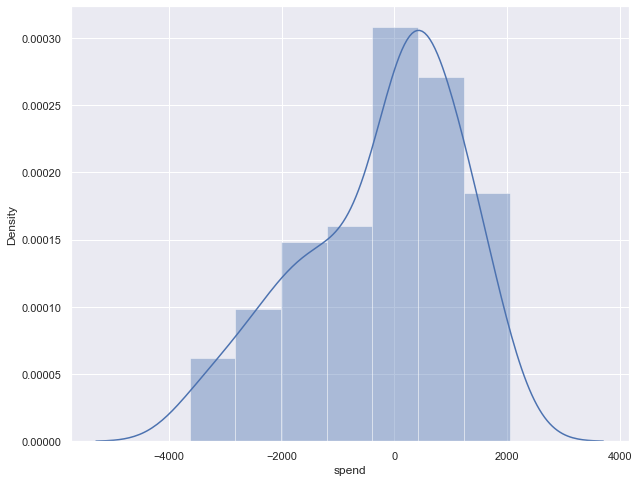

In [356]:
# Distribution Curve between the diffrences of y_test and ridge_predict
fig=py.figure(figsize=(10,8))
sns.set(style='darkgrid')
sns.distplot(y_test-ridge_predict)

# The curve shows the the values are properly distributed

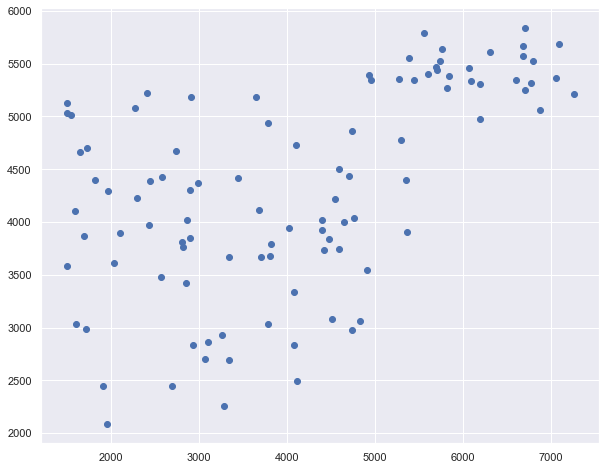

In [357]:
# Show the scatter plot between the y_test and ridge_predict
fig=py.figure(figsize=(10,8))
py.scatter(y_test,ridge_predict)

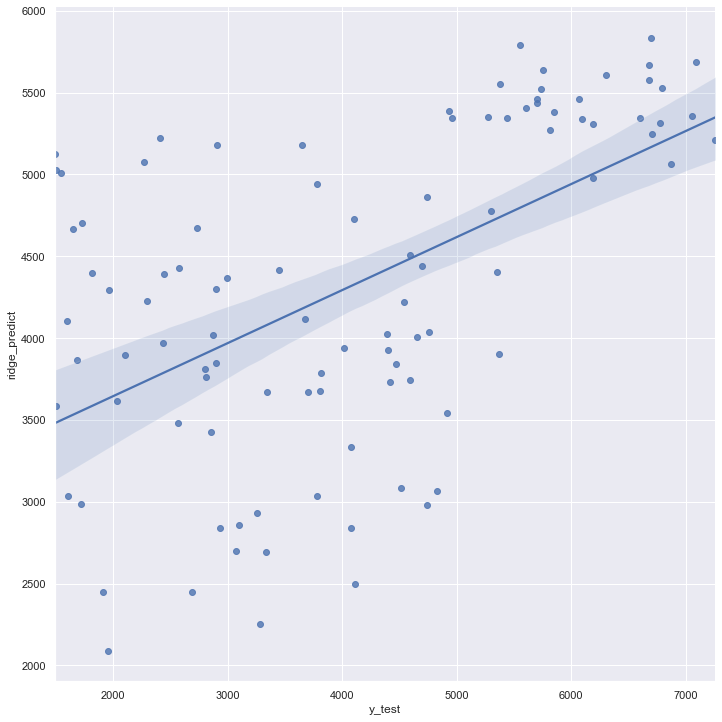

In [358]:
#Visualize The Linear Regression PLot
sns.lmplot(x='y_test',y='ridge_predict',
             data=pd.DataFrame({'y_test':y_test,'ridge_predict':ridge_predict}),height=10)

In [398]:
# Error metrics
print('Mean Absolute Error',mean_absolute_error(y_test,ridge_predict))
print('Mean Squared Error',mean_squared_error(y_test,ridge_predict))
print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,ridge_predict)))
print('Variance Score ', explained_variance_score(y_test,ridge_predict))

Mean Absolute Error 1104.609185126698
Mean Squared Error 1964074.8903381324
Root Mean Squared Erro 1401.45456235232
Variance Score  0.3005384285814331


In [389]:
#Second Model
lasso_model=LassoCV()

In [390]:
lasso_model.fit(X_train,y_train)

LassoCV()

In [391]:
lasso_predict=lasso_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spend', ylabel='Density'>

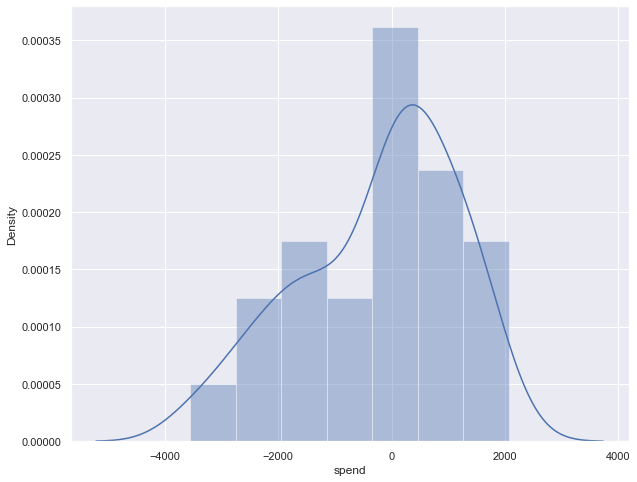

In [393]:
#Visualizing the relationships between the two plots

fig=py.figure(figsize=(10,8))
sns.distplot(y_test-lasso_predict)

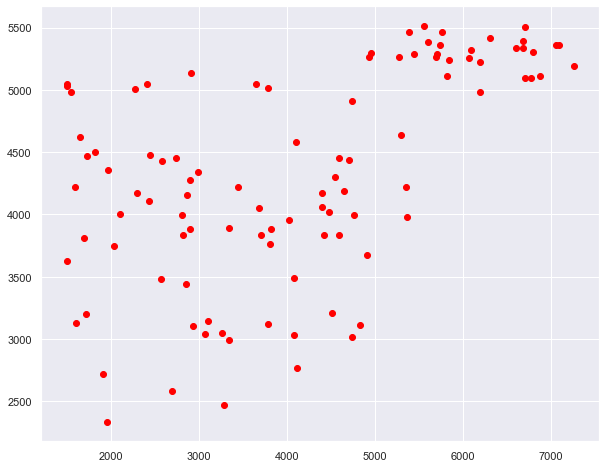

In [395]:
fig=py.figure(figsize=(10,8))
py.scatter(y_test,lasso_predict,color='red')

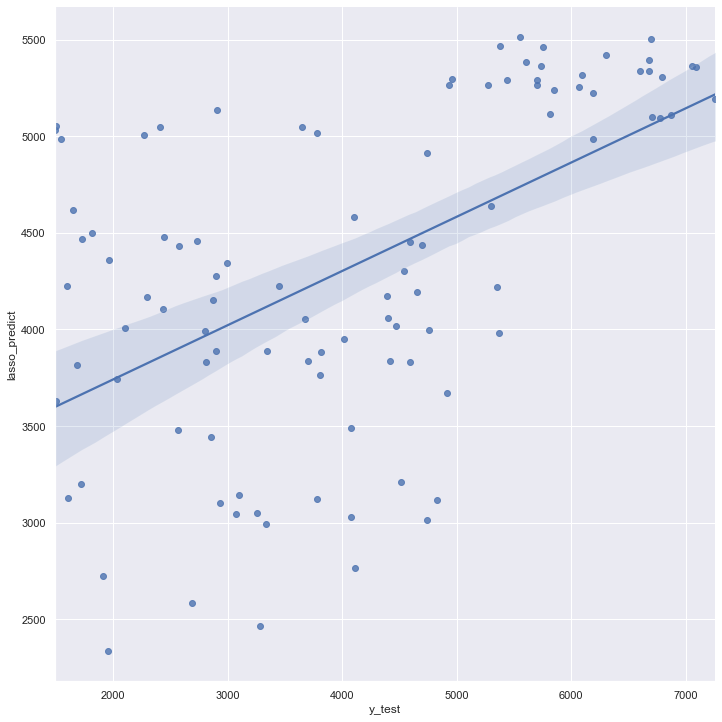

In [402]:
#Visualize The Linear Regression PLot
sns.lmplot(x='y_test',y='lasso_predict',
             data=pd.DataFrame({'y_test':y_test,'lasso_predict':lasso_predict}),height=10,)

In [403]:
# Error metrics
print('Mean Absolute Error',mean_absolute_error(y_test,lasso_predict))
print('Mean Squared Error',mean_squared_error(y_test,lasso_predict))
print('Root Mean Squared Erro',np.sqrt(mean_squared_error(y_test,lasso_predict)))
print('Variance Score',explained_variance_score(y_test,lasso_predict))


Mean Absolute Error 1112.6779301108866
Mean Squared Error 1981452.7407387889
Root Mean Squared Erro 1407.6408422388108
Variance Score 0.29517335064246153
